<!-- Data downloaded from Kaggle - 
Product Listing from Amazon India
https://www.kaggle.com/datasets/thedevastator/2019-e-commerce-product-listings-from-amazon-ind -->

### Original dataset from data.world

Product Listing on Amazon India <br>
https://data.world/promptcloud/product-listing-on-amazon-india

This dataset will be used to create posts for the campus marketplace mobile application.<br>
Common columns such as Product Title, Category, Brand, Product Description, and Price will be used. <br>
The dataset will be motified further to suit the needs for the marketplace application. 

### Preprocess data

In [121]:
import pandas as pd
import numpy as np
from faker import Faker
import re
import random
import matplotlib.pyplot as plt

In [122]:
# Import data
df = pd.read_csv('original_amazon.csv')
df.head(2)

,index,Uniq Id,Crawl Timestamp,Category,Product Title,Product Description,Brand,Pack Size Or Quantity,Mrp,Price,Site Name,Offers,Combo Offers,Stock Availibility,Product Asin,Image Urls
0,0,eb49cc038190f6f03c272f79fbbce894,2019-10-30 11:38:11 +0000,Skin Care,Lee posh Lactic Acid 60% Anti ageing Pigmenta...,PROFESSIONAL GRADE Face Peel: this peel stimul...,Lee Posh,NaN,2000.00,799.00,Amazon In,60.05%,NaN,YES,B072BGHNJ1,https://images-na.ssl-images-amazon.com/images...
1,1,1657cc30c438affede6a5060d6847363,2019-10-31 15:46:54 +0000,Skin Care,Branded SLB Works New 1.5mm Titanium 1200 nee...,Item name: 1.5mm titanium 1200 needles microne...,SLB Works,NaN,2040.00,2040.00,Amazon In,0%,NaN,YES,B07QDTZYSJ,https://images-na.ssl-images-amazon.com/images...


In [123]:
df.shape

(30000, 16)

In [124]:
# Only keep select columns
columns_to_keep = ['Category', 'Product Title', 'Product Description', 'Brand', 'Price']
df = df[columns_to_keep]

# Drop rows with null values
df = df.dropna()

df.head(2)

,Category,Product Title,Product Description,Brand,Price
0,Skin Care,Lee posh Lactic Acid 60% Anti ageing Pigmenta...,PROFESSIONAL GRADE Face Peel: this peel stimul...,Lee Posh,799.00
1,Skin Care,Branded SLB Works New 1.5mm Titanium 1200 nee...,Item name: 1.5mm titanium 1200 needles microne...,SLB Works,2040.00


In [125]:
# Remove all words and characters that are not English alphabet or numbers
import re
df['Text'] = df['Product Title'].str.replace('[^A-Za-z0-9]', '', flags=re.UNICODE)
df['Text'] = df['Product Description'].str.replace('[^A-Za-z0-9]', '', flags=re.UNICODE)

C:\Users\Yera\AppData\Local\Temp\ipykernel_23400\3359699059.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Text'] = df['Product Title'].str.replace('[^A-Za-z0-9]', '', flags=re.UNICODE)
C:\Users\Yera\AppData\Local\Temp\ipykernel_23400\3359699059.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Text'] = df['Product Description'].str.replace('[^A-Za-z0-9]', '', flags=re.UNICODE)


In [126]:
# Create a new column for conditions and randomly assign a value
conditions = ['New', 'Very good', 'Good', 'Bad', 'Very bad']
df['Conditions'] = np.random.choice(conditions, size=len(df))

df.head(2)

,Category,Product Title,Product Description,Brand,Price,Text,Conditions
0,Skin Care,Lee posh Lactic Acid 60% Anti ageing Pigmenta...,PROFESSIONAL GRADE Face Peel: this peel stimul...,Lee Posh,799.00,PROFESSIONALGRADEFacePeelthispeelstimulatescol...,Very bad
1,Skin Care,Branded SLB Works New 1.5mm Titanium 1200 nee...,Item name: 1.5mm titanium 1200 needles microne...,SLB Works,2040.00,Itemname15mmtitanium1200needlesmicroneedlesmes...,New


In [127]:
# Check values for category
df['Category'].unique()

array(['Skin Care', 'Grocery & Gourmet Foods', 'Bath & Shower',
       'Fragrance', 'Hair Care', 'Detergents & Dishwash'], dtype=object)

In [128]:
# Merge Category with Brand column
df['Category'] = df['Category'] + ' | ' + df['Brand']
df.drop(columns=['Brand'], inplace=True)

df.head(2)

,Category,Product Title,Product Description,Price,Text,Conditions
0,Skin Care | Lee Posh,Lee posh Lactic Acid 60% Anti ageing Pigmenta...,PROFESSIONAL GRADE Face Peel: this peel stimul...,799.00,PROFESSIONALGRADEFacePeelthispeelstimulatescol...,Very bad
1,Skin Care | SLB Works,Branded SLB Works New 1.5mm Titanium 1200 nee...,Item name: 1.5mm titanium 1200 needles microne...,2040.00,Itemname15mmtitanium1200needlesmicroneedlesmes...,New


In [129]:
# Create a new column named 'Description Length'
df['Description Length'] = df['Product Description'].apply(lambda x: len(x.split()))

df.head()

,Category,Product Title,Product Description,Price,Text,Conditions,Description Length
0,Skin Care | Lee Posh,Lee posh Lactic Acid 60% Anti ageing Pigmenta...,PROFESSIONAL GRADE Face Peel: this peel stimul...,799.00,PROFESSIONALGRADEFacePeelthispeelstimulatescol...,Very bad,47
1,Skin Care | SLB Works,Branded SLB Works New 1.5mm Titanium 1200 nee...,Item name: 1.5mm titanium 1200 needles microne...,2040.00,Itemname15mmtitanium1200needlesmicroneedlesmes...,New,161
2,Skin Care | Generic,Generic 1 Pc brand snail eye cream remove dar...,"Use: eye, item type: cream, net wt: 20g, gzzz:...",1042.00,Useeyeitemtypecreamnetwt20ggzzzygzwbzmodelnumb...,Very good,64
3,Skin Care | Generic,Generic Anti Snoring Snore Stopper Sleep Apne...,Prevent the tongue from dropping backward or b...,1399.00,Preventthetonguefromdroppingbackwardorblockthe...,Very bad,73
4,Grocery & Gourmet Foods | Harveys,Harveys Crunchy & Creame Gourmet Delicacies C...,Harvey's wafer Cream Wafer 110g. Made in India,570.00,HarveyswaferCreamWafer110gMadeinIndia,Good,8


In [130]:
# First time installment
# pip install faker


Because this dataset is from India, there are lots of titles and descriptions that have word India or Indian. <br>
In order to remove bias and suit the market in America, country names in the dataset will randomly be changed to various country names. 

In [131]:
# Uncomment for the first time installment
# pip install pycountry

In [132]:
# Faker instance for generating country names
faker = Faker()

# Regular expression to match 'India' or 'Indian'
country_regex = re.compile(r'\b(India|Indian)\b', flags=re.IGNORECASE)

# Function to replace 'India' or 'Indian' with random country names
def replace_country(match):
    return faker.country()

# Replace 'India' or 'Indian' in the DataFrame
df['Product Title'] = df['Product Title'].apply(lambda x: country_regex.sub(replace_country, x))
df['Product Description'] = df['Product Description'].apply(lambda x: country_regex.sub(replace_country, x))

df.head(2)

,Category,Product Title,Product Description,Price,Text,Conditions,Description Length
0,Skin Care | Lee Posh,Lee posh Lactic Acid 60% Anti ageing Pigmenta...,PROFESSIONAL GRADE Face Peel: this peel stimul...,799.00,PROFESSIONALGRADEFacePeelthispeelstimulatescol...,Very bad,47
1,Skin Care | SLB Works,Branded SLB Works New 1.5mm Titanium 1200 nee...,Item name: 1.5mm titanium 1200 needles microne...,2040.00,Itemname15mmtitanium1200needlesmicroneedlesmes...,New,161


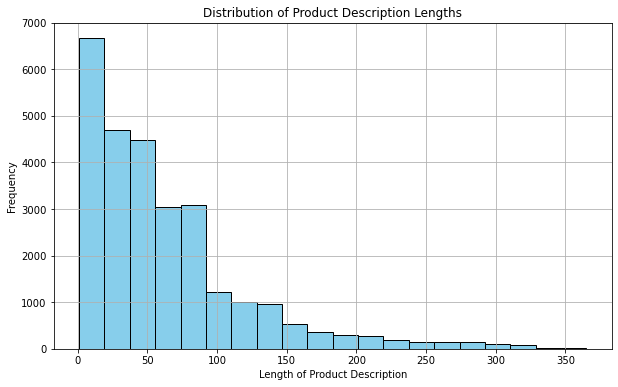

In [133]:
# Analyze the Product Description to determine cutoff point
plt.figure(figsize=(10, 6))
plt.hist(df['Description Length'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Product Description Lengths')
plt.xlabel('Length of Product Description')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [134]:
# Analyze further to determine cutoff percentage 
description = df['Description Length'].describe()
print(description)

count    27468.000000
mean        62.813965
std         58.668311
min          1.000000
25%         20.000000
50%         46.000000
75%         82.000000
max        365.000000
Name: Description Length, dtype: float64


In [135]:
# Calculate the 85th percentile of description lengths
percentile_85 = df['Description Length'].quantile(0.85)

# Delete rows that go over 85th percentile 
df = df[df['Description Length'] <= percentile_85]

description = df['Description Length'].describe()
print(description)

count    23356.000000
mean        42.920192
std         28.790256
min          1.000000
25%         17.000000
50%         39.000000
75%         64.000000
max        111.000000
Name: Description Length, dtype: float64


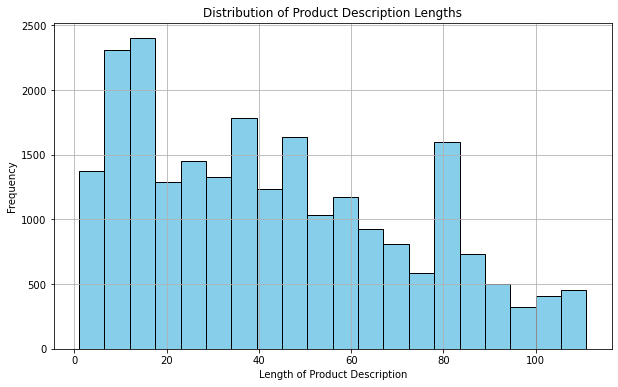

In [136]:
# Visualize the Product Description by Length and Frequency
plt.figure(figsize=(10, 6))
plt.hist(df['Description Length'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Product Description Lengths')
plt.xlabel('Length of Product Description')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [137]:
# Change 'Price' column type to numeric 
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Set exchange rate for Indian Rupee to US Dollars
exchange_rate = 0.014

# Create a new column for Price in US Dollar 
df['Price in USD'] = df['Price'] * exchange_rate

# Round 'Price in USD' column to two decimal places
df['Price in USD'] = df['Price in USD'].round(2)

df.head()

,Category,Product Title,Product Description,Price,Text,Conditions,Description Length,Price in USD
0,Skin Care | Lee Posh,Lee posh Lactic Acid 60% Anti ageing Pigmenta...,PROFESSIONAL GRADE Face Peel: this peel stimul...,799.0,PROFESSIONALGRADEFacePeelthispeelstimulatescol...,Very bad,47,11.19
2,Skin Care | Generic,Generic 1 Pc brand snail eye cream remove dar...,"Use: eye, item type: cream, net wt: 20g, gzzz:...",1042.0,Useeyeitemtypecreamnetwt20ggzzzygzwbzmodelnumb...,Very good,64,14.59
3,Skin Care | Generic,Generic Anti Snoring Snore Stopper Sleep Apne...,Prevent the tongue from dropping backward or b...,1399.0,Preventthetonguefromdroppingbackwardorblockthe...,Very bad,73,19.59
4,Grocery & Gourmet Foods | Harveys,Harveys Crunchy & Creame Gourmet Delicacies C...,Harvey's wafer Cream Wafer 110g. Made in Korea,570.0,HarveyswaferCreamWafer110gMadeinIndia,Good,8,7.98
5,Skin Care | ShiKai,"Shikai Borage Dry Skin Therapy Foot Cream, 4....","Package Quantity:3 Contains borage oil, clinic...",5344.0,PackageQuantity3Containsborageoilclinicallypro...,Very bad,28,74.82


In [138]:
# Analyze Price column to determine cutoff point
percentiles = df['Price'].describe(percentiles=[0.25, 0.50, 0.75, 0.90, 0.95, 0.99])
print(percentiles)

count    23301.000000
mean      2186.321817
std       2372.812649
min         12.000000
25%        429.000000
50%       1048.000000
75%       3347.000000
90%       5979.000000
95%       7524.000000
99%       9292.000000
max      21990.000000
Name: Price, dtype: float64


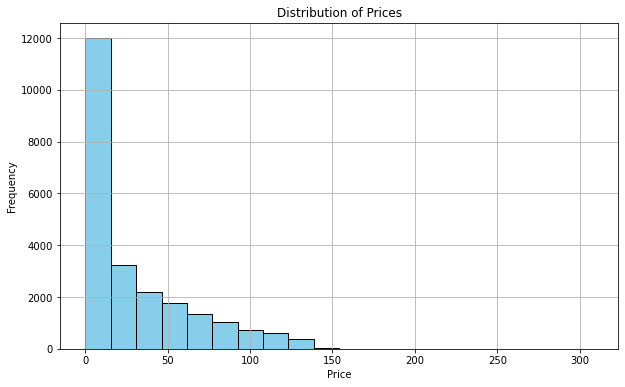

In [139]:
# Plot histogram to see distribution for Price
plt.figure(figsize=(10, 6))
plt.hist(df['Price in USD'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [140]:
# Calculate the 99th percentile
percentile_99 = df['Price in USD'].quantile(0.99)

# Update the DataFrame to include only prices up to the 99th percentile
df = df[df['Price in USD'] <= percentile_99]

df.head()

,Category,Product Title,Product Description,Price,Text,Conditions,Description Length,Price in USD
0,Skin Care | Lee Posh,Lee posh Lactic Acid 60% Anti ageing Pigmenta...,PROFESSIONAL GRADE Face Peel: this peel stimul...,799.0,PROFESSIONALGRADEFacePeelthispeelstimulatescol...,Very bad,47,11.19
2,Skin Care | Generic,Generic 1 Pc brand snail eye cream remove dar...,"Use: eye, item type: cream, net wt: 20g, gzzz:...",1042.0,Useeyeitemtypecreamnetwt20ggzzzygzwbzmodelnumb...,Very good,64,14.59
3,Skin Care | Generic,Generic Anti Snoring Snore Stopper Sleep Apne...,Prevent the tongue from dropping backward or b...,1399.0,Preventthetonguefromdroppingbackwardorblockthe...,Very bad,73,19.59
4,Grocery & Gourmet Foods | Harveys,Harveys Crunchy & Creame Gourmet Delicacies C...,Harvey's wafer Cream Wafer 110g. Made in Korea,570.0,HarveyswaferCreamWafer110gMadeinIndia,Good,8,7.98
5,Skin Care | ShiKai,"Shikai Borage Dry Skin Therapy Foot Cream, 4....","Package Quantity:3 Contains borage oil, clinic...",5344.0,PackageQuantity3Containsborageoilclinicallypro...,Very bad,28,74.82


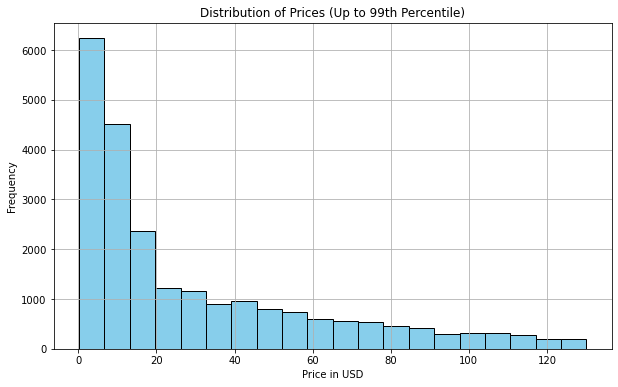

In [141]:
# Plot histogram of the new 'Price' column
plt.figure(figsize=(10, 6))
plt.hist(df['Price in USD'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Prices (Up to 99th Percentile)')
plt.xlabel('Price in USD')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [142]:
# Calculate box plot percentiles for the filtered data
percentiles_filtered = df['Price in USD'].describe(percentiles=[0.25, 0.50, 0.75, 0.90, 0.95, 0.99])
print(percentiles_filtered)

count    23069.000000
mean        29.541540
std         31.600067
min          0.170000
25%          5.940000
50%         14.200000
75%         45.350000
90%         80.614000
95%        100.160000
99%        122.880000
max        130.090000
Name: Price in USD, dtype: float64


In [143]:
df.shape

(23069, 8)

In [144]:
# Drop the column with price in Indian Rupee and replace with column with price in USD
df.drop(columns=['Price'], inplace=True)
df.rename(columns={'Price in USD': 'Price'}, inplace=True)

In [145]:
# Define the desired column order
desired_columns = ['Category', 'Product Title', 'Product Description', 'Price', 'Conditions', 'Description Length']

# Reorder the columns
df = df.reindex(columns=desired_columns)

In [146]:
df.head(2)

,Category,Product Title,Product Description,Price,Conditions,Description Length
0,Skin Care | Lee Posh,Lee posh Lactic Acid 60% Anti ageing Pigmenta...,PROFESSIONAL GRADE Face Peel: this peel stimul...,11.19,Very bad,47
2,Skin Care | Generic,Generic 1 Pc brand snail eye cream remove dar...,"Use: eye, item type: cream, net wt: 20g, gzzz:...",14.59,Very good,64


In [147]:
# Save the preprocessed dataframe
df.to_csv('preprocessed_amazon.csv', index=False)
